<a href="https://colab.research.google.com/github/shukurullo2004/Machine-learnings/blob/main/exercise_pytorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [25]:
X = torch.arange(0,5, 0.05).unsqueeze(dim=1)
weight = 0.3
bias = 0.9
y = weight * X + bias

In [26]:
split_data = int(0.8*len(X))
X_train, y_train = X[:split_data], y[:split_data]
X_test, y_test = X[split_data:], y[split_data:]
len(X_train),len(y_train), len(X_test),len(y_test)

(80, 80, 20, 20)

In [27]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_label, c = "b", s=4, label = "Train_data")
  plt.scatter(test_data, test_label, c = "r", s=4, label = "Test_data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c = "g", s=4, label = "Predictions")

  plt.legend(prop={"size": 14});


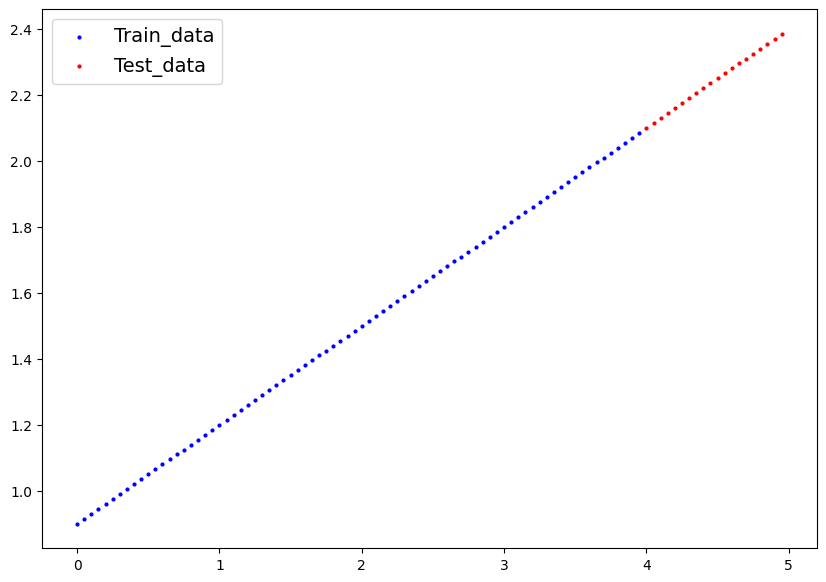

In [28]:
plot_predictions(predictions= None)

In [29]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad= True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias


In [30]:
torch.manual_seed(25)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([1.1781], requires_grad=True),
 Parameter containing:
 tensor([0.1056], requires_grad=True)]

In [31]:
model_0.state_dict()

OrderedDict([('weight', tensor([1.1781])), ('bias', tensor([0.1056]))])

In [32]:
with torch.inference_mode():
  y_pred = model_0(X_test)
len(y_pred)

20

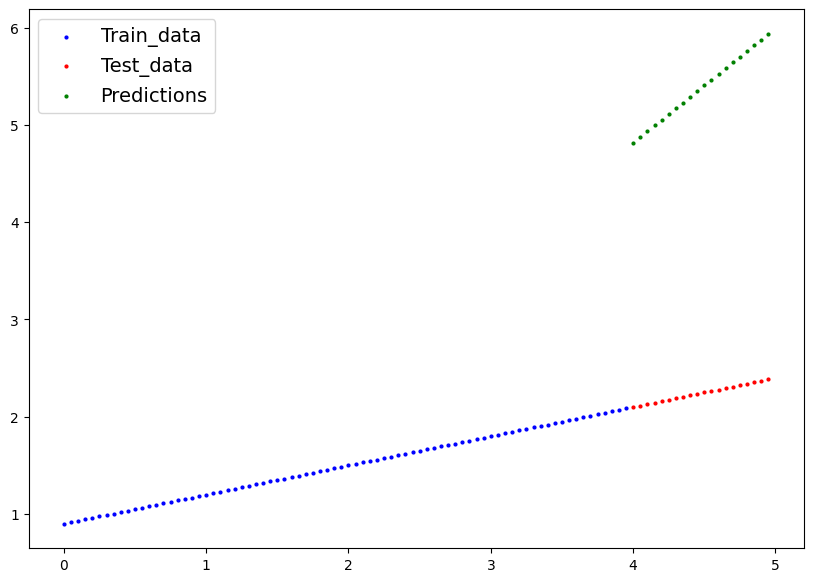

In [33]:
plot_predictions(predictions=y_pred)

In [34]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.001)

In [35]:
import numpy as np

In [36]:
torch.manual_seed(25)

epochs = 3000

epoch_list = []
train_loss_list = []
test_loss_list = []

for epoch in range(epochs):

  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))
    if epoch%20 == 0:
      epoch_list.append(epoch)
      train_loss_list.append(loss.detach().numpy())
      test_loss_list.append(test_loss.detach().numpy())

      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 1.1293952465057373 | MAE Test Loss: 3.1264538764953613 
Epoch: 20 | MAE Train Loss: 1.0620044469833374 | MAE Test Loss: 2.9585890769958496 
Epoch: 40 | MAE Train Loss: 0.9969615936279297 | MAE Test Loss: 2.793632984161377 
Epoch: 60 | MAE Train Loss: 0.9343681335449219 | MAE Test Loss: 2.631723642349243 
Epoch: 80 | MAE Train Loss: 0.874370276927948 | MAE Test Loss: 2.4731364250183105 
Epoch: 100 | MAE Train Loss: 0.8171119689941406 | MAE Test Loss: 2.3181777000427246 
Epoch: 120 | MAE Train Loss: 0.7628336548805237 | MAE Test Loss: 2.1673285961151123 
Epoch: 140 | MAE Train Loss: 0.7120269536972046 | MAE Test Loss: 2.021289348602295 
Epoch: 160 | MAE Train Loss: 0.6643552780151367 | MAE Test Loss: 1.879940390586853 
Epoch: 180 | MAE Train Loss: 0.6207176446914673 | MAE Test Loss: 1.7447839975357056 
Epoch: 200 | MAE Train Loss: 0.5806779265403748 | MAE Test Loss: 1.615566611289978 
Epoch: 220 | MAE Train Loss: 0.5444712042808533 | MAE Test Loss: 1.4927427768

In [37]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3017])), ('bias', tensor([0.9000]))])

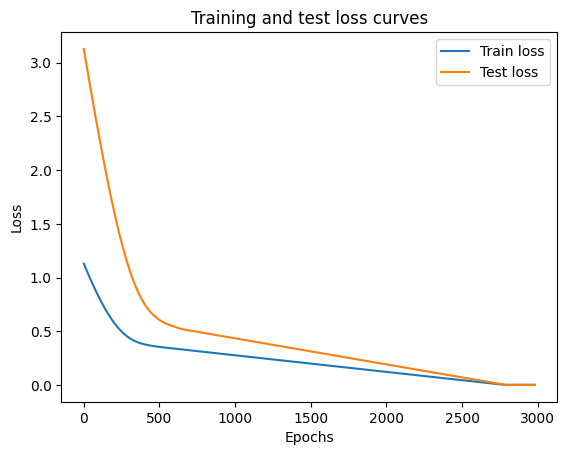

In [38]:
plt.plot(epoch_list, train_loss_list, label="Train loss")
plt.plot(epoch_list, test_loss_list, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

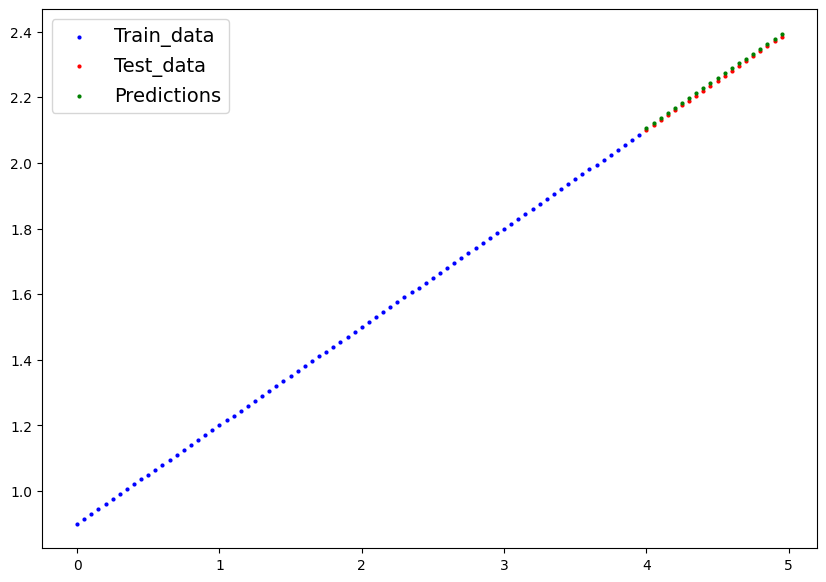

In [39]:
model_0.eval()
with torch.inference_mode():
  y_pred = model_0(X_test)
plot_predictions(predictions=y_pred)

In [40]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "Exercise.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/Exercise.pth


In [41]:
!ls -l models/Exercise.pth

-rw-r--r-- 1 root root 1502 Jan 11 11:44 models/Exercise.pth


In [42]:
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

y_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])